# Uvod u strojno učenje 



### Što je strojno učenje?
Arthur Samuel je opisao strojno učenje kao sposobnost računala da uči bez da je eksplicitno programirano. 
Novija i prihvaćenija definicija je ona Toma Mitchella: <br>
    Kažemo da program uči zadatak T kroz iskustvo E ako se njegova perfomansa P u izvođenju zadatka T poboljšava s rastom iskustva E. <br>
Primjer: igranje šaha
    E = iskustvo stečeno kroz igranje mnogo partija šaha
    T = igranje šaha
    P = vjerojatnost da će program pobijediti iduću partiju šaha

Osnovna podjela: 
    1. nadzirano učenje - klasifikacija i regresija
    2. nenadzirano učenje - grupiranje i smanjenje dimenzionalnosti

### Primjeri strojnog učenja koji utječu na svakodnevicu

-SIRI koristi principe strojnog učenja i drugih tehnologija za imitaciju ljudskih reakcija. <br>
-FACEBOOK koristi impresivnu tehnologiju kako bi predložio korisnicima koga treba *taggirati* na slikama <br>
-GOOGLE MAPS analizira brzinu u prometu koristeći anonimne lokacijske usluge s mobitela i tako predlaže najbržu rutu. <br>
-GMAIL klasificira mailove, ali nedavno su predstavili i sustav koji automatski predlaže tri odgovora na mail. <br>
-NETFLIX-u je strojno učenje nužno za prijedloge serija i filmova <br>
-UBER kroz strujno učenje procijenjuje brzinu dolaska na odredište <br>


U ovom radu bavit ću se nadziranim učenjem.
U nadziranom učenju dani su nam podaci i znamo što bi trebao biti točan _output_. Postoje dvije, već navedene, kategorije - klasifikacija i regresija. <br>
    Klasifikaciju koristimo ako je _output_ **y** diskretna varijabla, dok regresiju kada je **y** kontinuirana varijabla.

### Primjeri nadziranog učenja:
**klasifikacija**: podaci koji sadrže veličinu tumora i podatak o tome je li tumor dobroćudan (0) ili zloćudan (1) <br>
**regresija**: podaci koji sadrže veličinu kuće i cijenu za koju je ta kuća prodana.
    

### Funkcija pogreške 


Pretpostavimo da imamo podatke gdje je $x_{i}$ *input*, a $y_{i}$ *output*. Funkciju $h_{\theta}$ zovemo hipoteza. <br>
Funkcijom pogreške mjerimo kvadratno odstupanje funkcije hipoteze u točki $x_{i}$ od stvarne, pripadajuće vrijednosti $y_{i}$

$$J(\theta)=\frac{1}{2N}\sum_{i=1}^{N} (y_{i}-h_{\theta}(x_{i}))^2 $$	

Cilj nam je dobiti što bolju funkciju hipoteze, tj. **minimizirati funkciju pogreške**. *Idealno*, funkcija bi trebala proći kroz sve točke x. U tom slučaju je funkcija pogreške 0. 

### Linearna regresija
Neka je funkcija hipoteze sljedećeg oblika: <br>$h_{\theta}(x)=\theta_{n}*x_{n}+\theta_{n-1}*x_{n-1}+...+\theta_{1}*x_{1}+\theta_{0}$<br><br>
notacija: $x_{j}^{(i)}$=vrijednost svojstva j u i-tom treningu <br>
$x^{(i)}$=svojstva i-tog treninga <br>
$m$ = broj treninga <br>
$n$ = broj svojstava 

Primjer: Prodajemo kuću i zanima nas njena očekivana cijena. Uzimamo u obzir svojstva poput veličine kuće, broja katova, broja soba, kupaonica i slično. Pomoću linearne regresije predviđamo cijenu kuće na temelju prethodno prodanih kuća sličnih svojstava.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import matrix
import pandas as pd

%matplotlib inline

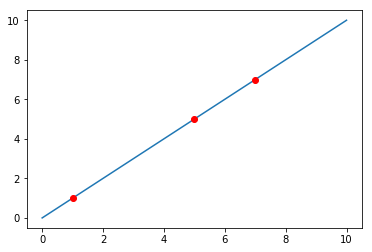

In [6]:
fig1 = plt.figure()
ax1 = plt.axes()
x = np.linspace(0, 10, 1000)
x2 = np.array([1, 5, 7])
y2 = np.array([1, 5, 7])
ax1.plot(x, x);
ax1.plot(x2, y2, 'ro');

Ovaj graf prikazuje podatke gdje je funkcija pogreške 0.


Dakle, naša funkcija hipoteze je $h_{\theta}(x)$=x, gdje je $\theta_{1}=1$, a $\theta_{0}=0$. Promijenimo li funkciju $h_{\theta}(x)$=2x, gdje je $\theta_1=2$, dobivamo ovakav graf:

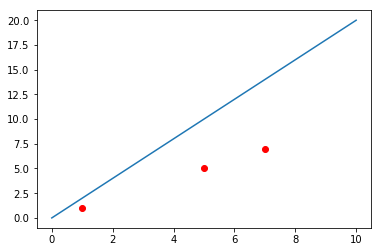

In [7]:
fig2 = plt.figure()
ax2 = plt.axes()
x = np.linspace(0, 10, 1000)
x2 = np.array([1, 5, 7])
y2 = np.array([1, 5, 7])
ax2.plot(x, 2*x);
ax2.plot(x2, y2, 'ro');

Točke više ne leže točno na pravcu, tj. funkcija pogreške više nije 0. <br>


**Kod za izračunavanje funkcije greške:**

In [145]:
def h(X, theta):
    return X * theta

def cost(X, y, theta):
    tmp1 = X*theta - y
    tmp2 = tmp1.T * tmp1 
    m = np.size(y)
    
    return (1/(2*m)) * tmp2

Na prethodnom trivijalnom primjeri izračunajmo funkciju greške.

In [21]:
x2 = np.matrix([1, 5, 7]).T
y = x2 - 2*x2
x = x2
cost(x, y, 2)

matrix([[ 112.5]])

### Kako odrediti odgovarajuće parametre $\theta$?

Nakon što smo predstavili funkciju hipoteze i funkciju greške, preostaje
odrediti odgovarajuće parametre. To ćemo učiniti pomoću **gradijenta**.

Intuitivno, neka je funkcija hipoteze oblika $h_{\theta}(x)=\theta_{1}*x_{1}+\theta_{0}$. Nacrtamo graf koji na x-osi ima parametar $\theta_{0}$, a na y-osi $\theta_{1}$, dok je na z-osi vrijednost funkcije $J(\theta_{0},\theta_{1})$. Znamo da nam je cilj pronaći minimum takve funkcije. To ćemo postići tako da krenemo od bilo koje točke i promatramo tangentu u toj točki koja će nam "reći" u kojem pravcu se trebamo gibati kako bismo došli do minimuma. Gibamo se u koracima veličine $\alpha$. $\alpha$ ne smije biti niti prevelik niti premalen. Ako se povećanjem broja iteracija, funkcija greške povećava, trebamo smanjiti $\alpha$. No, ako je $\alpha$ premalen, konvergencija može biti jako spora.
        

**Algoritam:** <br>
*ponavljati dok ne konvergira:* <br>
     $\theta_{j}=\theta_{j}-\alpha\frac{\delta}{\delta\theta_{j}}J(\theta_{0},\theta_{1})*x_{j} $ <br><br>
     $j=0,...,n$ <br>
     $x_{0}=1$

Možemo ubrzati taj algoritam tako da je svako svojstvo sličnog reda veličine. Za to postoje dva načina: <br>
1. skaliranje svojstava <br>
    $x_{i}:=\frac{x_{i}}{max(x)-min(x)}$
2. normalizacija <br>
    $x_{i}:=\frac{x_{i}-\mu_{i}}{s_{i}}$


Sljedeći primjer prikazuje (redom po stupcima) veličinu kuće, broj soba, broj katova, starost kuće, zadnji stupac je za koliko tisuća dolara je kuća prodana. Dakle, imamo više svojstava, no relativno malen n. 

In [55]:
kuce = pd.read_csv('houses.csv', header=None,\
                   names=['velicina_kuce', 'broj_soba', 'broj_katova', 'starost_kuce', 'cijena_1000usd'])
kuce

,velicina_kuce,broj_soba,broj_katova,starost_kuce,cijena_1000usd
0,2104,5,1,45,460
1,1416,3,2,40,232
2,1534,3,2,30,315
3,852,2,1,36,178


In [56]:
kuce = matrix(kuce.as_matrix())
X = kuce[:, 0:-1]
X = np.insert(X, 0, values=1, axis=1)
y = kuce[:, -1]
X

matrix([[   1, 2104,    5,    1,   45],
        [   1, 1416,    3,    2,   40],
        [   1, 1534,    3,    2,   30],
        [   1,  852,    2,    1,   36]], dtype=int64)

In [120]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = np.size(y)
    for i in range(ite):
        pred = np.dot(X, theta)
        vel = np.size(theta)
        for it in range(vel):
            tmp = X[:, it]
            err=(pred-y)*tmp
            theta[it][0]=theta[it][0]-(alpha/m)*err.sum()
    return theta

def gradient_descent_vectorized(X, y, theta, alpha, iterations):
    m = np.size(y)
    step = alpha/m
    for i in range(iterations):
        theta -= step * X.T * (X*theta - y)
        
    return theta

In [134]:
theta = matrix(np.random.uniform(-100, 100, size=(5,1)), dtype=float)
theta_nova = gradient_descent_vectorized(X, y, theta.copy(), alpha=0.1, iterations=5)
a = cost(X, y, theta) 
b = cost(X, y, theta_nova)

In [146]:
# Greska, trebas mu dati neki svoj mali x=[velicina_kuce, broj_soba, itd.], a on ti treba vratiti cijenu.
# Takoder provjeri definiciju od h. Ukoliko np.dot() dobro izbaci, koristi njega da imas funkciju vise, u suprotnom
# samo pomnozi X*theta
h(X, theta)

matrix([[-5186.56835938],
        [-3704.03417969],
        [-3893.72973633],
        [-4184.44482422]])

Drugi način za  određivanje odgovarajućih parametara je **normalna jednadžba**. <br>
Ovom metodom, minimiziramo funkciju $J(\theta)$ tako da eksplicitno deriviramo po $\theta_{j}$ te derivacije izjednačavamo s 0. Tako nalazimo optimum bez iteracija. 
$$\theta=(X^{T}X)^{-1}X^{T}y$$ <br>
Ova metoda je bolja jer ne trebamo odabirati $\alpha$, nemamo iteracija, no složenija je i sporija ako je broj svojstava velik.

Prethodni primjer gdje koristimo normalnu jednadžbu kako bismo odredili odgovarajuće parametre $\theta$:

Koristimo već zapisanu formulu $\theta=(X^{T}X)^{-1}X^{T}y$. <br>
Važno je napomenuti da vrijednost $x_{0}$ postavljamo na 0. Dakle, matrica X je oblika:


In [139]:
# Sve importe stavi na pocetak notebooka.
y = np.matrix('460; 232; 315; 178')
X_T = X.transpose()
from numpy.linalg import inv
inverz = inv(X_T*X)
theta = inverz*X_T*y
theta

matrix([[-3497.84375   ],
        [   -6.49743652],
        [ 2550.65625   ],
        [ 1825.109375  ],
        [  -57.70019531]])

Dakle, metodom normalne jednadžbe funkcija hipoteze nam izgleda:
$$h_{\theta}(x)=-3497.84375-9.74353027*x_{1}+3822.65625*x_{2}+1452.109375*x_{3}+28.42480469*x_{4}$$

In [140]:
cost(X, y, theta)

matrix([[ 10515053.76732109]])

In [141]:
h(X, theta)

matrix([[-5186.56835938],
        [-3704.03417969],
        [-3893.72973633],
        [-4184.44482422]])

### Polinomijalna regresija
Hipoteza ne mora biti linearna funkcija ako dobro ne opisuje zadane podatke. Možemo promijeniti ponašanje krivulje tako da odaberemo kvadratnu, kubičnu ili neku sličnu krivulju. 

### Logistička regresija

Što raditi kada imamo problem klasifikacije, tj. *output* je diskretna varijabla? <br>
*Primjer*: Želimo napraviti algoritam koji prepoznaje spam mail. Neka je $y=1$ ako je to spam, u suprotnom $y=0$. Dakle, $y\in{0,1}$. <br>
0 se često naziva negativnom klasom, a 1 pozitivnom. 

Za potrebe klasifikacije, konstruiramo novu funkciju - **sigmoid function** ili **logistička funkcija**. <br>
$$h_{\theta}=g(\theta^{T}x)$$ <br>
$$z=\theta^{T}x$$ <br>
$$g(z)=\frac{1}{1+e^{-z}} $$

Sljedeća slika prikazuje izgled sigmoid funkcije.

In [147]:
import math
def sigmoid(x):
    s = 1.0 + np.exp(-x)
    s = 1.0/s
    
    return s

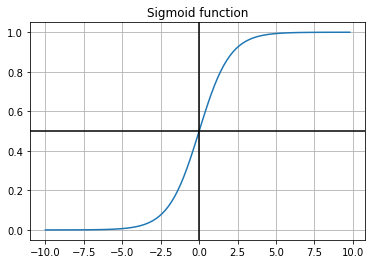

In [153]:
# Dodao sam ti osi ovdje, meni tako ljepse izgleda, ali namjesti to jos kako ti je bolje.
x = np.arange(-10., 10., 0.2)
y = np.linspace(0, len(x), len(x))

plt.plot(x,sigmoid(x))
plt.grid(True, which='both')
plt.axhline(y=0.5, color='k')
plt.axvline(x=0, color='k')
plt.title('Sigmoid function')
plt.show()

Očito je da sigmoid funkcija poprima vrijednosti između 0 i 1 što je čini pogodnim izborom za klasifikacijske probleme. <br>
$h_{\theta}(x)$ daje **vjerojatnost** da je naš *output* 1. Preciznije, $h_{\theta}(x)=P(y=1|x;\theta)$

Uz sve rečeno, granica odlučivanja je linija koja razdvaja podatke gdje je y=1 od onih gdje je y=0. <br>
$h_{\theta}\geq0.5\rightarrow y=1$ <br>
$h_{\theta}<0.5\rightarrow y=0$

Potrebno je prilagoditi i funkciju greške zbog toga što bi logistička funkcija na prethodno definiranoj funkciji greške uzrokovala puno lokalnih optimuma, tj. ne bi bila konveksna. 

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)},y^{(i)})$$

$Cost(h_{\theta}(x),y)=-log(h_{\theta}(x))$ ako y=1 <br>
$Cost(h_{\theta}(x),y)=-log(1-h_{\theta}(x))$ ako y=0 

In [244]:
import numpy as np
from math import log
# Probaj biti konzistenta kod definicije funkcije. Ranije si imala cost(X, y, theta), a tu si promijenila redoslijed
# u cost(theta, X, y)
def log_cost(theta,X,y):
    theta=np.matrix(theta)
    y=np.matrix(y)
    X=np.matrix(X)
    m=len(X)
    temp1=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    temp2=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    J=np.sum(temp1-temp2)/m
    return J

def log_cost_vectorized(theta, X, y):
    m = np.size(y)
    J = (-y.T * np.log(sigmoid(X*theta))) * \
        ((1-y).T * np.log(1 - sigmoid(X*theta)))
    
    return J/m

C:\Users\matej\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


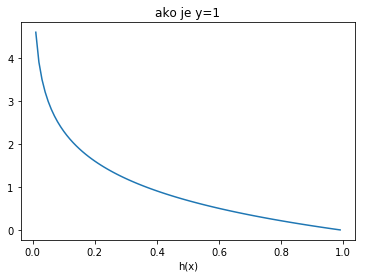

In [163]:
import matplotlib.pyplot as plt
x=np.arange(0.,1.,0.01)
y=np.linspace(0,len(x),len(x))
sig=-np.log(x)
plt.plot(x,sig)
plt.title('ako je y=1')
plt.xlabel('h(x)')
plt.show()

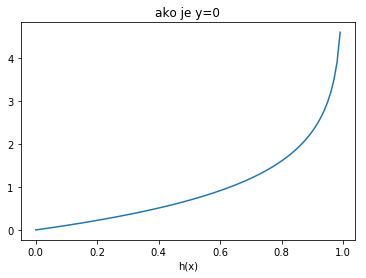

In [164]:
x=np.arange(0.,1.,0.01)
y=np.linspace(0,len(x),len(x))
sig=-np.log(1-x)
plt.plot(x,sig)
plt.title('ako je y=0')
plt.xlabel('h(x)')
plt.show()

Gradijent funkcije troška je vektor čiji je j-ti element definiran na sljedeći način:

$$\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_{j}^{(i)}$$

In [272]:
def grad(theta,X,y):
    theta=np.matrix(theta)
    y=np.matrix(y)
    X=np.matrix(X)
    gradient=np.zeros(3)
    rez=gradient.size
    razlika=sigmoid(X.dot(theta.T))-y
    m=X.shape[0]
    for i in range(rez):
        temp5=razlika.T.dot(X[:,i])
        gradient[i]=(1.0/m)*temp5*-1
    theta.shape=(3,)
    return gradient

def gradient_vectorized(theta, X, y):
    m = np.size(y)
    theta = matrix(theta).T
    grad = X.T * (sigmoid(X * theta) - y)
    
    return grad/m

Pokažimo logističku regresiju na primjeru: <br>
*Administratori smo nekog sveučilišta i želimo procijeniti vjerojatnost primanja na sveučilište svakog prijavljenog studenta s obzirom na rezultate postignute na dva testa.* <br>
Prvo je korisno vizualizirati podatke:

In [254]:
from numpy import loadtxt, where
from pylab import scatter, xlabel, ylabel, legend, show
import pandas as pd
exams = pd.read_csv('studentsdata.txt', sep=',', names=['test_1', 'test_2', 'primljeni'])
exams

,test_1,test_2,primljeni
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


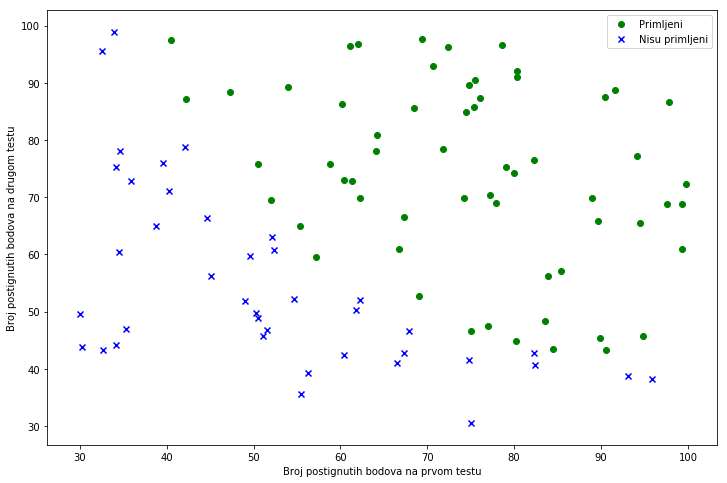

In [170]:
fig,ax=plt.subplots(figsize=(12,8))
pos=exams[exams['primljeni'].isin([1])]
neg=exams[exams['primljeni'].isin([0])]
scatter(pos['test_1'],pos['test_2'],marker='o',c='g',label='Primljeni')
scatter(neg['test_1'],neg['test_2'],marker='x',c='b',label='Nisu primljeni')
ax.legend()
xlabel('Broj postignutih bodova na prvom testu')
ylabel('Broj postignutih bodova na drugom testu')
show()

Gdje su plavo označeni primljeni, a zeleno označeni nisu primljeni na fakultet. <br>


Na tom primjeru isprobajmo funkcionira li prethodno napisana funkcija log_cost koja računa funkciju greške kod logističkog modela.

In [200]:
def random_numbers_generator(a, b, d1, d2):
    v = np.random.rand(d1, d2)
    v = (b-a)*v + a 
    
    return v

In [255]:
exams.insert(0,'jedinice',1)
stupci = exams.shape[1]
X = exams.iloc[:,0:stupci-1]
y = exams.iloc[:,stupci-1:stupci]
X = matrix(X.values)
y = matrix(y.values)
theta = matrix(random_numbers_generator(-0.5, 0.5, 3, 1), dtype=float)
# Mozemo krenuti i s nulama i s random generatorom.
# Usporedi rezultate.

Dodali smo stupac jedinica u podatke kako bismo mogli pozvati funkciju log_cost, za primjer uzimamo $\theta=(0,0,0)$

Da bismo odredili vjerojatnost primanja studenta na sveučilište s obzirom na dva testa, prvo moramo naći minimum funkcije greške, tj. odrediti parametre za logističku regresiju. U tu svrhu koristimo scipy funkciju **fmin_tnc**. 

In [281]:
import scipy.optimize as opt
parametri = opt.fmin_tnc(func=log_cost_vectorized, fprime=gradient_vectorized, x0=theta, args=(X, y))

In [ ]:
log_cost(parametri[0],X,y)

In [ ]:
def predict(theta,X):
    m=np.size(X,1)
    p=round(sigmoid(X*theta))
    return p

### Problem *overfittinga*

Promatrajmo problem predviđanja y s obzirom na x $\in R$. Prvi graf prikazuje rezultat prilagdođavanja $y=\theta_{0}+\theta_{1}x$ zadanim podacima. Vidimo da podaci zapravo ne leže na ravnoj liniji pa procjena nije dovoljno dobra. <br>
Ako dodamo dodatno svojstvo $x^{2}$, $y=\theta_{0}+\theta_{1}x+\theta_{2}x^{2}$ tada krivulja bolje opisuje podatke. <br>
Međutim, postoji i opasnost u dodavanju previše svojstava. Treći graf je rezultat opisivanja podataka polinomom stupnja 5. Iako krivulja savršeno opisuje zadane podatke, ona nije dobar predikator. <br>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f1(t):
    return 2*t+1
def f2(t):
    return t**2+t+1
def f3(t):
    return t**5+t**4+2*t**3
t1=np.arange(-1.0,1.5,0.1)
plt.figure(1)
plt.subplot(331)
plt.plot(t1,f1(t1))
plt.plot([0.5,1,-0.5],[1.4,2.5,0.5],'ro')
plt.subplot(332)
plt.plot([1,0.5,0],[2.7,1.7,0.9],'ro')
plt.plot(t1,f2(t1))
plt.subplot(333)
plt.plot(t1,f3(t1))
plt.plot([1,-1,0],[4,-2,0],'ro')

Kažemo da je prvi graf primjer *underfittinga* - krivulja ne opisuje dobro podatke, dok je treći graf primjer *overfittinga*. <br> <br>
**Rješavanje problema overfittinga:** <br>
1. smanjenje broja svojstava
2. regularizacija

**Regularizacija:** <br>
Funkcija troška postaje: <br>
$$min_{\theta} \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})^{2}+\lambda\sum_{j=1}^{n}\theta_{j}^{2}$$

$\lambda$ je regularizacijski parametar. Koristeći takvu funkciju troška smanjujemo *overfitting*. No, $\lambda$ ne smije biti prevelik kako ne bismo došli do *underfittinga*. 

**Regularizirana linearna i logistička regresija:** <br>
Modificirani gradijent: <br>
            Repeat {
 $$\theta_{0}:=\theta_{0}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_{0}^{(i)}$$ 
 $$\theta_{j}:=\theta_{j}-\alpha((\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_{j}^{(i)})+\frac{\lambda}{m}\theta_{j})$$
} <br>
j$\in${1,2,...,n}